Creating New Features  

We can create valuable features by combining two or more variables. For example, in finance, the disposable income, which is the total income minus the acquired debt for any one month, might be more predictive of credit risk than just the income. Similarly, the total acquired debt of a person across financial products, such as a car loan, a mortgage, and credit cards, might be more predictive of credit risk than any debt considered individually. In these examples, we used domain knowledge of the data to craft the new variables, and the new variables were created by adding or subtracting existing features.

In some cases, a variable may not have a linear or monotonic relationship with the target, but a polynomial combination might. For example, if our variable has a quadratic relationship with the target, , we can convert that into a linear relationship by squaring the original variable. We can also obtain better variable relationships with the target by transforming the variables through splines, or by using decision trees.

In this chapter, we will create new features using multiple mathematical functions that will be applied based on domain knowledge, and then automate feature creation by combining existing features with polynomial functions or decision trees or by creating new features using splines

Combining features with mathematical functions

New features can be created by combining existing variables with mathematical and statistical functions. At the beginning of this chapter, we mentioned that we can calculate the total debt by summing up the debt across individual financial products, as follows:

Total debt = car loan debt + credit card debt + mortgage debt

We can also derive other insightful features using alternative statistical operations. For example, we can determine the maximum debt of a customer across financial products or the average time users have spent on a web page:

maximum debt = max(car loan balance, credit card balance, mortgage balance)

average time on page = mean(time spent user 1, time spent user 2, time spent user 3)

We can, in principle, use any mathematical or statistical operation to create new features, such as the product, mean, standard deviation, or maximum or minimum values, to name a few. In this recipe, we will implement these mathematical operations using pandas and Feature-engine

Combining features with mathematical functions

New features can be created by combining existing variables with mathematical and statistical functions. At the beginning of this chapter, we mentioned that we can calculate the total debt by summing up the debt across individual financial products, as follows:

Total debt = car loan debt + credit card debt + mortgage debt

We can also derive other insightful features using alternative statistical operations. For example, we can determine the maximum debt of a customer across financial products or the average time users have spent on a web page:

maximum debt = max(car loan balance, credit card balance, mortgage balance)

average time on page = mean(time spent user 1, time spent user 2, time spent user 3)

We can, in principle, use any mathematical or statistical operation to create new features, such as the product, mean, standard deviation, or maximum or minimum values, to name a few. In this recipe, we will implement these mathematical operations using pandas and Feature-engine.

In [1]:
import pandas as pd
from feature_engine.creation import MathFeatures 
from sklearn.datasets import load_breast_cancer

In this recipe, we will use the Breast Cancer dataset that comes with scikit-learn, which contains information about the morphology of cell nuclei in tissue samples, and a target indicating whether they are cancerous cells. The features are computed from digitized images of breast cells, and they describe the characteristics of the cell nuclei in those images

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)


features = ["mean smoothness","mean compactness","mean concavity","mean concave points","mean symmetry",]

df["mean_features"] = df[features].mean(axis=1)

df["mean_features"].head()



0    0.21702
1    0.10033
2    0.16034
3    0.20654
4    0.14326
Name: mean_features, dtype: float64

In [3]:
# to capture the general variability of the cell nuclei, let’s determine the standard deviation of the 
#mean characteristics, and then display the resulting

df["std_features"] = df[features].std(axis=1)

df["std_features"].head()

0    0.080321
1    0.045671
2    0.042333
3    0.078097
4    0.044402
Name: std_features, dtype: float64

In [4]:
#make a list containing mathematical functions that we want to use to combine the features

math_func = ["sum", "prod", "mean", "std", "max", "min"]

#let’s apply the previous functions to combine the features, and capture the resulting variables in a new

df_t = df[features].agg(math_func, axis="columns")
df_t

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.217020,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.100330,0.045671,0.1812,0.07017
2,0.80170,0.000092,0.160340,0.042333,0.2069,0.10960
3,1.03270,0.000267,0.206540,0.078097,0.2839,0.10520
4,0.71630,0.000050,0.143260,0.044402,0.1980,0.10030
...,...,...,...,...,...,...
564,0.78230,0.000075,0.156460,0.054604,0.2439,0.11100
565,0.61831,0.000025,0.123662,0.034686,0.1752,0.09780
566,0.49138,0.000007,0.098276,0.038644,0.1590,0.05302
567,1.13790,0.000418,0.227580,0.094452,0.3514,0.11780


In [5]:
#we can use mathfeatures
new_feature_names = ["sum_f", "prod_f", "mean_f", "std_f", "max_f", "min_f"]

create = MathFeatures(variables=features,func=math_func,new_variables_names=new_feature_names,)

df_t = create.fit_transform(df)

df_t


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst symmetry,worst fractal dimension,mean_features,std_features,sum_f,prod_f,mean_f,std_f,max_f,min_f
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.4601,0.11890,0.217020,0.080321,1.08510,0.000351,0.217020,0.080321,0.3001,0.11840
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.2750,0.08902,0.100330,0.045671,0.50165,0.000007,0.100330,0.045671,0.1812,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.3613,0.08758,0.160340,0.042333,0.80170,0.000092,0.160340,0.042333,0.2069,0.10960
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.6638,0.17300,0.206540,0.078097,1.03270,0.000267,0.206540,0.078097,0.2839,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.2364,0.07678,0.143260,0.044402,0.71630,0.000050,0.143260,0.044402,0.1980,0.10030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.2060,0.07115,0.156460,0.054604,0.78230,0.000075,0.156460,0.054604,0.2439,0.11100
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.2572,0.06637,0.123662,0.034686,0.61831,0.000025,0.123662,0.034686,0.1752,0.09780
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.2218,0.07820,0.098276,0.038644,0.49138,0.000007,0.098276,0.038644,0.1590,0.05302
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.4087,0.12400,0.227580,0.094452,1.13790,0.000418,0.227580,0.094452,0.3514,0.11780


In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() 

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Comparing features to reference variables

Combining features with mathematical functions, we created new features by applying mathematical or statistical functions, such as the sum or the mean, to a group of variables. Some mathematical operations, however, such as subtraction or division, make more sense when performed between two features, or when considering multiple features against one reference variable. These operations are very useful to derive ratios, such as the debt-to-income ratio:

debt-to-income ratio = total debt / total income

Alternatively, we can use them for differences, for example, to calculate disposable income:

disposable income = income - total debt

In this recipe, we will learn how to create new features via subtraction or division while utilizing pandas, and then automate the procedure for multiple variables by using Feature-engine

In [7]:
#these are basic things we can have domain knowledge you can easily create it

from feature_engine.creation import RelativeFeatures 
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

#capture the difference between two features, the worst compactness and mean compactness of cell nuclei, in a new variable and display its

df["difference"] = df["worst compactness"].sub(df["mean compactness"]) 

df["difference"].head()


df["difference"] = df["worst compactness"] - (df["mean compactness"])

In [8]:
#create a new feature with the ratio between the worst and mean radius of the nuclei, and then display its


df["quotient"] = df["worst radius"].div(df["mean radius"])


df["quotient"] = df["worst radius"] / (df["mean radius"])

df["quotient"].head()


0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

In [9]:
#we can also feature engering

features = ["mean smoothness","mean compactness", "mean concavity","mean symmetry"]

reference = ["mean radius", "mean area"]

creator = RelativeFeatures(variables=features,reference=reference,
                           func=["sub", "div"],)


df_t = creator.fit_transform(df)

In [10]:
new_features = [f for f in df_t.columns if f not in creator.feature_names_in_]

new_features

df_t[new_features].head()

,mean smoothness_sub_mean radius,mean compactness_sub_mean radius,mean concavity_sub_mean radius,mean symmetry_sub_mean radius,mean smoothness_sub_mean area,mean compactness_sub_mean area,mean concavity_sub_mean area,mean symmetry_sub_mean area,mean smoothness_div_mean radius,mean compactness_div_mean radius,mean concavity_div_mean radius,mean symmetry_div_mean radius,mean smoothness_div_mean area,mean compactness_div_mean area,mean concavity_div_mean area,mean symmetry_div_mean area
0,-17.87160,-17.71240,-17.6899,-17.7481,-1000.88160,-1000.72240,-1000.6999,-1000.7581,0.006581,0.015431,0.016681,0.013446,0.000118,0.000277,0.000300,0.000242
1,-20.48526,-20.49136,-20.4831,-20.3888,-1325.91526,-1325.92136,-1325.9131,-1325.8188,0.004120,0.003823,0.004225,0.008809,0.000064,0.000059,0.000066,0.000137
2,-19.58040,-19.53010,-19.4926,-19.4831,-1202.89040,-1202.84010,-1202.8026,-1202.7931,0.005566,0.008121,0.010025,0.010508,0.000091,0.000133,0.000164,0.000172
3,-11.27750,-11.13610,-11.1786,-11.1603,-385.95750,-385.81610,-385.8586,-385.8403,0.012478,0.024860,0.021138,0.022741,0.000369,0.000735,0.000625,0.000673
4,-20.18970,-20.15720,-20.0920,-20.1091,-1296.89970,-1296.86720,-1296.8020,-1296.8191,0.004943,0.006545,0.009759,0.008916,0.000077,0.000102,0.000153,0.000139


Performing polynomial expansion

polynomial you know that cofficents and variables exponets

 we will create features via polynomial expansion using a toy dataset so that we become familiar with the returned variables. Creating features via polynomial expansion of a real dataset is identical to what we will discuss in this recipe

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


df = pd.DataFrame(np.linspace(0,10,11) , columns=['var'])
df


poly = PolynomialFeatures(degree=4,interaction_only=False,include_bias=False)

dft = poly.fit_transform(df)

poly.get_feature_names_out()

array(['var', 'var^2', 'var^3', 'var^4'], dtype=object)

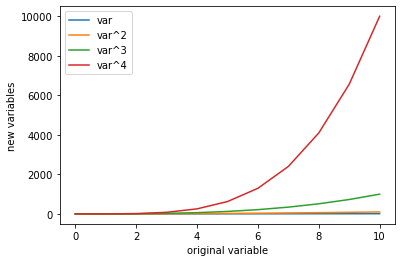

In [12]:
dft = pd.DataFrame(dft, columns=poly.get_feature_names_out())

plt.plot(df["var"], dft)

plt.legend(dft.columns)

plt.xlabel("original variable")

plt.ylabel("new variables")

plt.show()

 add two additional variables to our toy dataset, with values from 1 to 10

In [13]:
df["col"] = np.linspace(0, 5, 11)

df["feat"] = np.linspace(0, 5, 11)

In [14]:
#et’s combine the three features in the dataset with polynomial expansion up to the second degree, but this time, we will only return features 
#produced by combining at least two different variables

poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

poly

PolynomialFeatures(include_bias=False, interaction_only=True)

In [15]:
dft = poly.fit_transform(df)

dft = pd.DataFrame(dft, columns=poly.get_feature_names_out())

dft

,var,col,feat,var col,var feat,col feat
0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.0,0.5,0.5,0.5,0.5,0.25
2,2.0,1.0,1.0,2.0,2.0,1.00
3,3.0,1.5,1.5,4.5,4.5,2.25
4,4.0,2.0,2.0,8.0,8.0,4.00
5,5.0,2.5,2.5,12.5,12.5,6.25
6,6.0,3.0,3.0,18.0,18.0,9.00
7,7.0,3.5,3.5,24.5,24.5,12.25
8,8.0,4.0,4.0,32.0,32.0,16.00
9,9.0,4.5,4.5,40.5,40.5,20.25


Combining features with decision trees

In the winning solution of the KDD competition in 2009, the authors created new features by combining two or more variables using decision trees. When examining the variables, they noticed that some features had a high level of mutual information with the target yet low correlation, indicating that the relationship with the target was not monotonic. While these features were predictive when used in tree-based algorithms, linear models could not take advantage of them. Hence, to use these features in linear models, they replaced the features with the outputs of decision trees trained on the individual features, or combinations of two or three variables, to return new features with a monotonic relationship with the target.

So, in short, combining features with decision trees is particularly useful for deriving features that are monotonic with the target, which is convenient for linear models. The procedure consists of training a decision tree using a subset of the features – typically one, two, or three at a time – and then using the prediction of the tree as a new feature

In [16]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

In [17]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [18]:

param_grid = {"max_depth": [2, 3, 4, None]}
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv=5, scoring="neg_mean_squared_error",
                          param_grid=param_grid)

variables = ["AveRooms", "AveBedrms"]

tree_model.fit(X_train[variables], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, None]},
             scoring='neg_mean_squared_error')

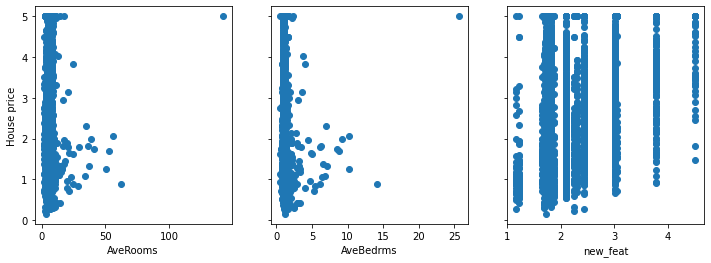

In [19]:
X_train["new_feat"] = tree_model.predict(X_train[variables])

X_test["new_feat"] = tree_model.predict(X_test[variables])

X_train["new_feat"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].scatter(X_test["AveRooms"], y_test)

axs[0].set_ylabel("House price")

axs[0].set_xlabel("AveRooms")

axs[1].scatter(X_test["AveBedrms"], y_test)

axs[1].set_xlabel("AveBedrms")

axs[2].scatter(X_test["new_feat"], y_test)

axs[2].set_xlabel("new_feat")

plt.show()

In [20]:
for var in variables + ["new_feat"]:
    corr = np.corrcoef(X_test[var], y_test)[0, 1]
    corr = np.round(corr, 3)
    print(f"Correlation between {var} and the target:{corr}")

Correlation between AveRooms and the target:0.141
Correlation between AveBedrms and the target:-0.033
Correlation between new_feat and the target:0.466


Creating periodic features from cyclical variables

Some features are periodic, for example, the hours in a day, the months in a year, and the days in a week. They all start at a certain value, say January, go up to a certain other value, say December, and then start over from the beginning. Some features are numeric, such as the hours, and some can be represented with numbers, such as the months, with values of 1 to 12. Yet, this numeric representation does not capture the periodicity or cyclical nature of the variable. For example, December (12) is closer to January (1) than June (6); however, this relationship is not captured by the numerical representation of the feature. But we could change it if we transformed these variables with sine and cosine, two naturally periodic functions.

Encoding cyclical features with the sine and cosine functions allows linear models to leverage the cyclical nature of features and reduce their modeling error. In this recipe, we will create new features from periodic variables that capture the cyclical nature of the feature.

#Trigonometric functions, such as sine and cosine, are periodic, with values cycling between -1 and 1 every 2π cycles:
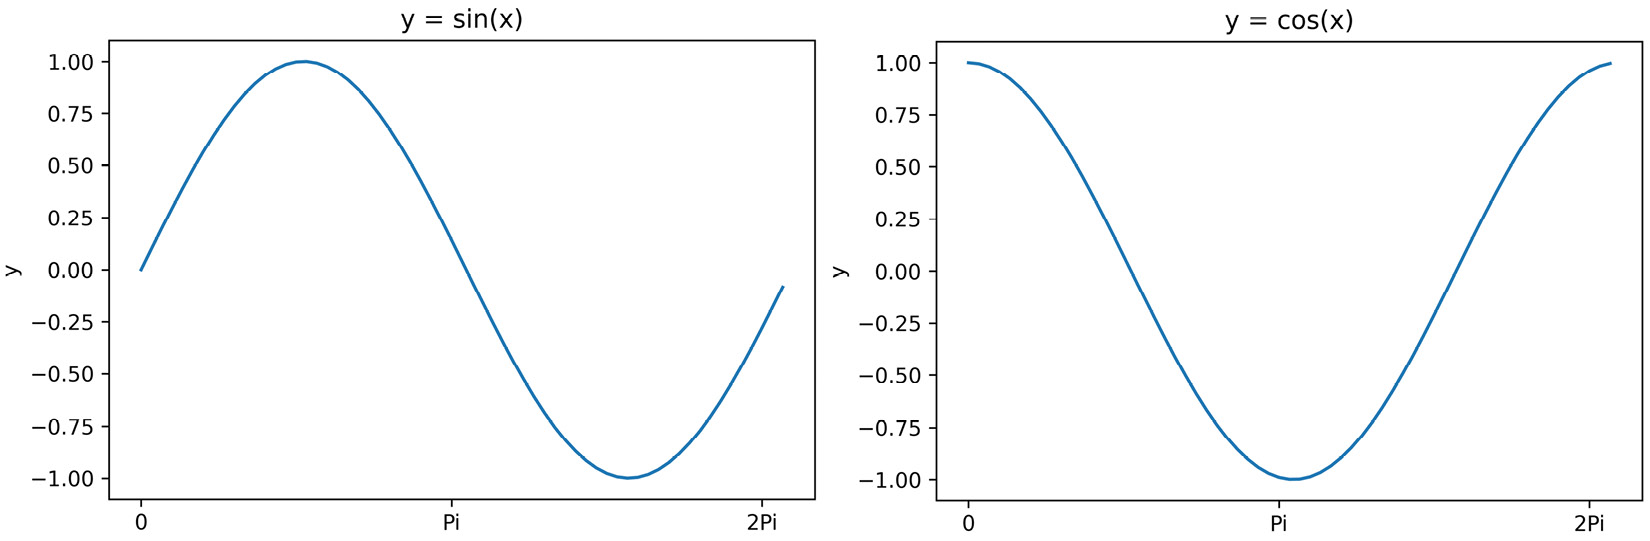


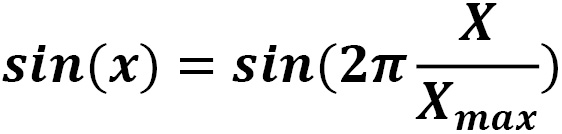

In [22]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

df = pd.DataFrame([i for i in range(24)], columns=["hour"])

#we will create two features using the sine and cosine transformations, after normalizing the variable values between 0 and 2π

df["hour_sin"] = np.sin(df["hour"] / df["hour"].max() * 2 * np.pi)

df["hour_cos"] = np.cos(df["hour"] / df["hour"].max() * 2 * np.pi)

df

,hour,hour_sin,hour_cos
0,0,0.000000e+00,1.000000
1,1,2.697968e-01,0.962917
2,2,5.195840e-01,0.854419
3,3,7.308360e-01,0.682553
4,4,8.878852e-01,0.460065
5,5,9.790841e-01,0.203456
6,6,9.976688e-01,-0.068242
7,7,9.422609e-01,-0.334880
8,8,8.169699e-01,-0.576680
9,9,6.310879e-01,-0.775711


Text(0.5, 1.0, 'Sine transformation')

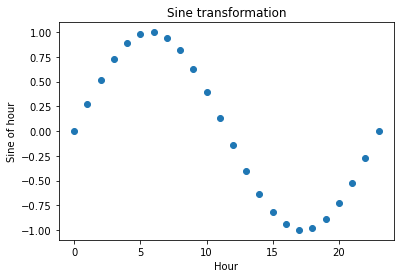

In [23]:
plt.scatter(df["hour"], df["hour_sin"])

plt.ylabel("Sine of hour")

plt.xlabel("Hour")

plt.title("Sine transformation")

#we can see how the values of the hour circle between -1 and 1, just like the sine function after the transformation


Text(0.5, 1.0, 'Cosine transformation')

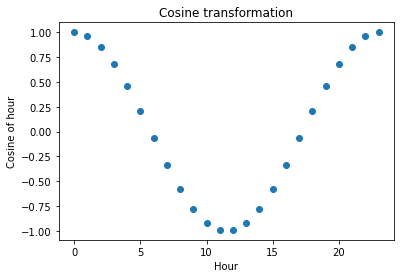

In [25]:
plt.scatter(df["hour"], df["hour_cos"])

plt.ylabel("Cosine of hour")

plt.xlabel("Hour")

plt.title("Cosine transformation")

#we can see how the values of the hour circle between -1 and 1, just like the cosine function after the transformation

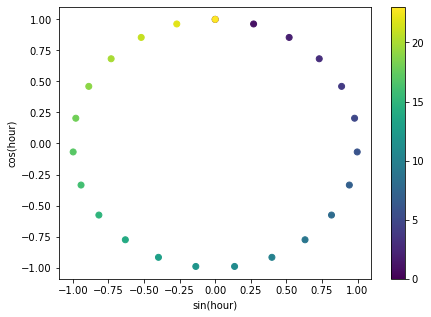

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))

sp = ax.scatter(df["hour_sin"], df["hour_cos"], c=df["hour"])

ax.set(xlabel="sin(hour)",ylabel="cos(hour)",)

_ = fig.colorbar(sp)

In [34]:
from feature_engine.creation import CyclicalFeatures
df = pd.DataFrame()

df["hour"] = pd.Series([i for i in range(24)])

df["month"] = pd.Series([i for i in range(1, 13)]*2)

df["week"] = pd.Series([i for i in range(7)]*4)

df.head()

cyclic = CyclicalFeatures(

        variables=None,

        drop_original=False,

)

dft = cyclic.fit_transform(df)

dft.head()


,hour,month,week,hour_sin,hour_cos,month_sin,month_cos,week_sin,week_cos
0,0,1,0,0.000000,1.000000,0.500000,8.660254e-01,0.000000e+00,1.0
1,1,2,1,0.269797,0.962917,0.866025,5.000000e-01,8.660254e-01,0.5
2,2,3,2,0.519584,0.854419,1.000000,6.123234e-17,8.660254e-01,-0.5
3,3,4,3,0.730836,0.682553,0.866025,-5.000000e-01,1.224647e-16,-1.0
4,4,5,4,0.887885,0.460065,0.500000,-8.660254e-01,-8.660254e-01,-0.5


Creating spline features

Linear models expect a linear relationship between the predictor variables and the target. However, we can use linear models to model non-linear effects if we first transform the features. In the Performing polynomial expansion recipe, we saw how we can unmask linear patterns by creating features with polynomial functions. In this recipe, we will discuss the use of splines.

Splines are used to mathematically reproduce flexible shapes. They consist of piecewise low-degree polynomial functions. To create splines, we must place knots at several values of x within its value range. These knots indicate where the pieces of the function join together. Then, we fit low-degree polynomials to the data between two consecutive knots.

There are several types of splines, such as smoothing splines, regression splines, and B-splines. scikit-learn supports the use of B-splines to create features. The procedure to fit and therefore return the spline values for a certain variable based on a polynomial degree and the number of knots exceeds the scope of this recipe. For more details, check out the resources in the See also section of this recipe. In this recipe, we’ll get a sense of what splines are and how we can use them to improve the performance of linear models


Let’s get a sense of what splines are. In the following figure, on the left, we can see a spline of degree 1. It consists of two linear pieces – one from 2.5 to 5 and the other from 5 to 7.5. There are three knots: 2.5, 5, and 7.5. And outside the interval of 2.5 to 7.5, the spline takes a value of 0. The latter is characteristic of splines; they are only non-negative between certain values. On the right-hand side of the figure, we can see three splines of degree 1. We can construct as many splines as we want by introducing more knots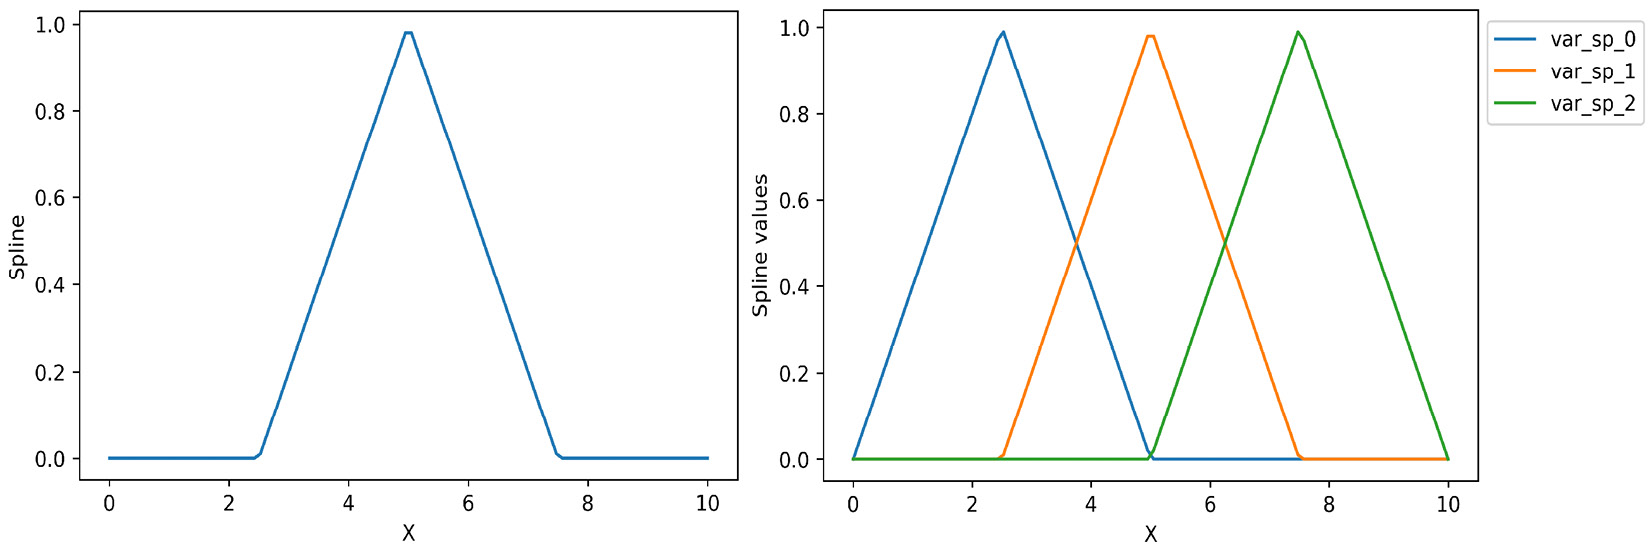

In [35]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

from sklearn.preprocessing import SplineTransformer

In [36]:
X = np.linspace(-1, 11, 20)

y = np.sin(X)

Text(0.5, 0, 'X')

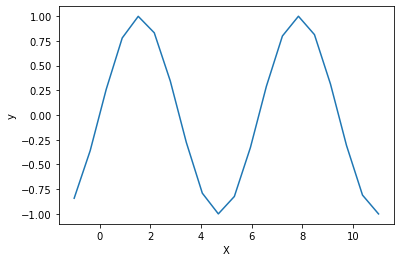

In [37]:
plt.plot(X, y)

plt.ylabel("y")

plt.xlabel("X")

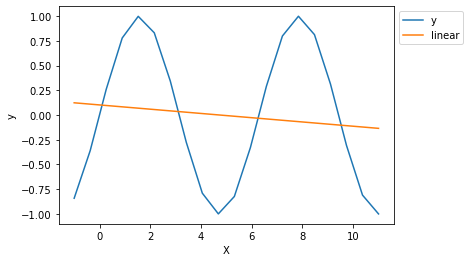

In [39]:
linmod = Ridge(random_state=10)

linmod.fit(X.reshape(-1, 1), y)

pred = linmod.predict(X.reshape(-1, 1))

plt.plot(X, y)

plt.plot(X, pred)

plt.ylabel("y")

plt.xlabel("X")

plt.legend(["y", "linear"], bbox_to_anchor=(1, 1), loc="upper left")

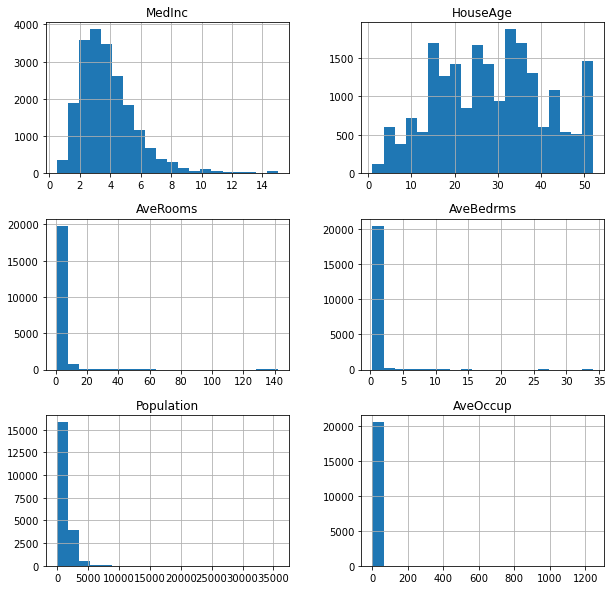

In [41]:
from sklearn.datasets import fetch_california_housing

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_validate


X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

X.hist(bins=20, figsize=(10,10))

plt.show()

In [42]:
linmod = Ridge(random_state=10)

cv = cross_validate(linmod, X, y)

mean_, std_ = np.mean(cv["test_score"]), np.std(cv["test_score"])

print(f"Model score: {mean_} +- {std_}")

Model score: 0.49061861596057516 +- 0.03617289854929794


In [43]:
spl = SplineTransformer(degree=3, n_knots=50)

ct = ColumnTransformer([("splines", spl, ["AveRooms", "AveBedrms","Population", "AveOccup"])],remainder="passthrough",)

ct.fit(X, y)

ColumnTransformer(remainder='passthrough',
                  transformers=[('splines', SplineTransformer(n_knots=50),
                                 ['AveRooms', 'AveBedrms', 'Population',
                                  'AveOccup'])])

In [45]:
cv = cross_validate(linmod, ct.transform(X), y)

mean_, std_ = np.mean(cv["test_score"]), np.std(cv["test_score"])
print(f"Model score: {mean_} +- {std_}")

Model score: 0.5553526813919296 +- 0.022445139927852402


In [46]:
#the math underlying B-splines, 